<a href="https://colab.research.google.com/github/supernova276/spam_detection/blob/main/SpamEmailDe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df=pd.read_csv('/content/spam_ham_dataset.csv')

In [147]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [148]:
df=df.drop(["Unnamed: 0","label"],axis=1)

In [149]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [150]:
df.shape

(5171, 2)

In [151]:
df.drop_duplicates(inplace=True)
#show the new shape
df.shape

(4993, 2)

In [152]:
#show the number of missing data for each column
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [153]:
#download stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [154]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [155]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [180]:
X=df.iloc[:,0].values
y=df.iloc[:,1].values
X.shape, y.shape

((4993,), (4993,))

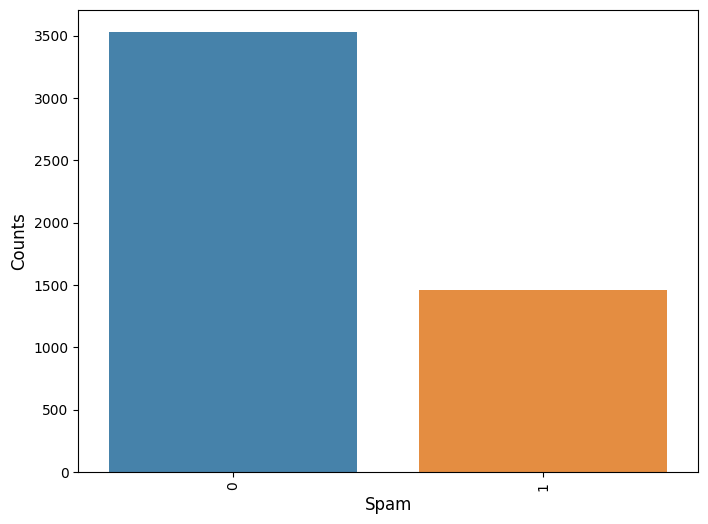

In [157]:
label_counts = df.label_num.value_counts()
plt.figure(figsize = (8,6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

#text preprocessing

In [158]:
def process_text(text):

  #tokenization of sentences
  sentences=[]
  sentences.append(sent_tokenize(text))
  
  #removing punctuations and 
  clean_text=re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " "  ,        # Replace all non-letters with spaces
                         str(text) )
 #remove hyperlinks
  clean_text=re.sub(r"http\S+", " ", clean_text)

  #lemmatizing words
  lm= WordNetLemmatizer()
  lem_data=[lm.lemmatize(word) for word in clean_text.split() if word.lower() not in stopwords.words('english')]
  clean_text=' '.join(lem_data)

  return clean_text

In [159]:
def getDoc(sent):
  corpus=[]
  for s in sent:
     corpus.append( process_text(s))
  return corpus

In [160]:
nltk.download('omw-1.4')
stemmed=getDoc(X)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [162]:
print(stemmed[:3])

['Subject enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purpose', 'Subject hpl nom january see attached file hplnol xl hplnol xl', 'Subject neon retreat ho ho ho around wonderful time year neon leader retreat time know time year extremely hectic tough think anything past holiday life go past week december january like think minute calender handed beginning fall semester retreat scheduled weekend january youth minister conference brad dustin connected week going change date following weekend january come part need think think agree important u get together time recharge battery get far spring semester lot trouble difficult u get away without kid etc brad came potential alternative get together weekend let know prefer first option would retreat similar done past several year year could go heartland country inn www com outside brenham n

# Feature Extraction

In [163]:
#the process of converting raw data into numerical data that can be processed by preserving the original data
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer()
X=tf_idf.fit_transform(stemmed).toarray()
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# splitting into train & test set

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=42)

#applying MultinomialNaiveBayes

In [165]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

#Predicting the results

In [166]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


#confusion matrix

In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[732   0]
 [ 70 197]]


0.92992992992993

<Axes: >

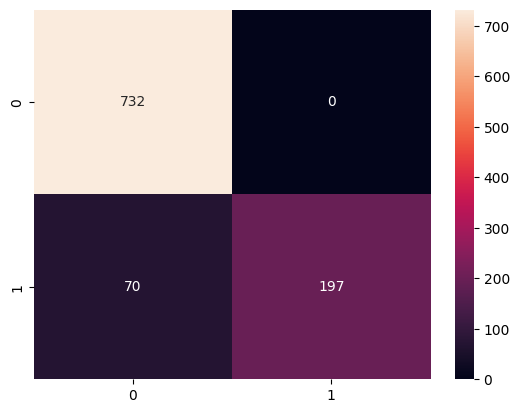

In [168]:
sns.heatmap(cm, annot=True, fmt="d")

In [169]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       732
           1       1.00      0.74      0.85       267

    accuracy                           0.93       999
   macro avg       0.96      0.87      0.90       999
weighted avg       0.94      0.93      0.93       999



#testing on real dataset

In [170]:
messages = [
    """
    Hi XYZ,
We invite you to participate in MishMash - India’s largest online diversity hackathon. 
The hackathon is a Skillenza initiative and sponsored by Microsoft, Unity, Unilever, Gojek, Rocketium and Jharkhand Government. 
We have a special theme for you - Deep Tech/Machine Learning - sponsored by Unilever, which will be perfect for you.
    """,
    """Join us today at 12:00 PM ET / 16:00 UTC for a Red Hat DevNation tech talk on AWS Lambda and serverless Java with Bill Burke.
Have you ever tried Java on AWS Lambda but found that the cold-start latency and memory usage were far too high? 
In this session, we will show how we optimized Java for serverless applications by leveraging GraalVM with Quarkus to 
provide both supersonic startup speed and a subatomic memory footprint.""",

    """We really appreciate your interest and wanted to let you know that we have received your application.
There is strong competition for jobs at Intel, and we receive many applications. As a result, it may take some time to get back to you.
Whether or not this position ends up being a fit, we will keep your information per data retention policies, 
so we can contact you for other positions that align to your experience and skill set.
""",

    """Dear Customer, We want to gladly announce that the stock we recommended in our Idea2Act report - 
HG Infra, has achieved target price within 10 days.The recommendation was made 
on 17th May and the stock touched a market high of Rs.402 on 27th May. That is a 21% profit margin.""",

"""Hey Akshita Dixit,
Welcome to Coding Blocks evaluation platform. Thank you for registering for ACE THE INTERVIEW - ACCENTURE .
Here are the details of the contest.
Test window	28 Jun 21 7:00 - 28 Jun 21 9:00
Duration	80 minutes
Contest Link	https://hack.codingblocks.com/app/contests/2421
You can attempt the test anytime after the test starts. Your test will automatically submit if the test duration is over or the test end time is reached, whichever is earlier.
Note: Please verify your email address here to avoid last minute hassles.
Feel free to reach out to us at support@codingblocks.com if you need any assistance with the contest."""
]

In [178]:
def prepare(messages):
   d=getDoc(messages)
   return tf_idf.transform(d)  

messages=prepare(messages)


In [179]:
y_pred = classifier.predict(messages)
y_pred

array([1, 0, 0, 0, 0])